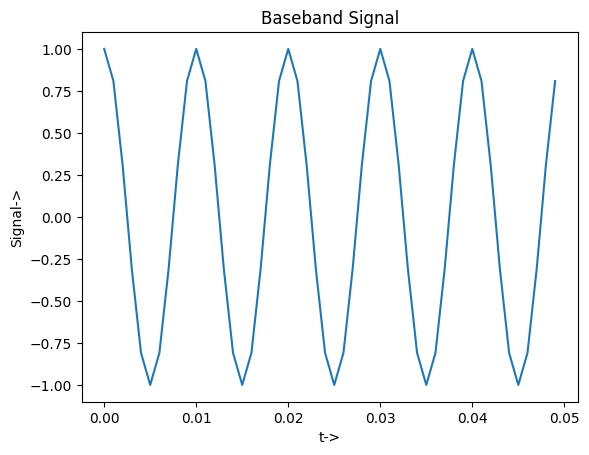

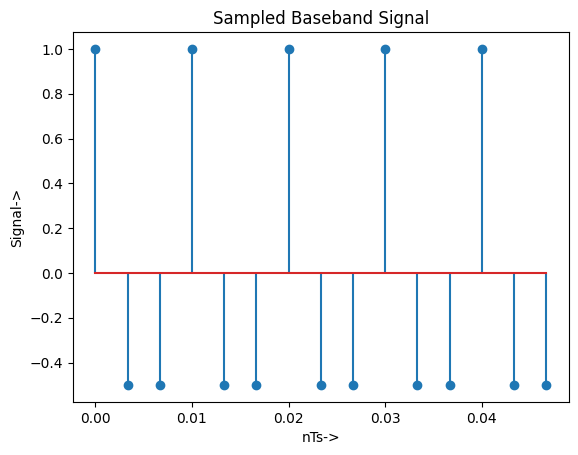

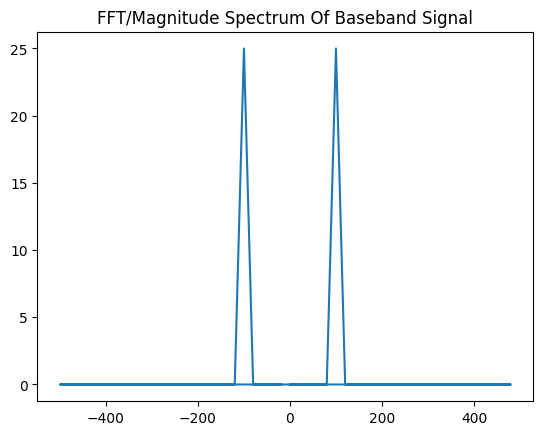

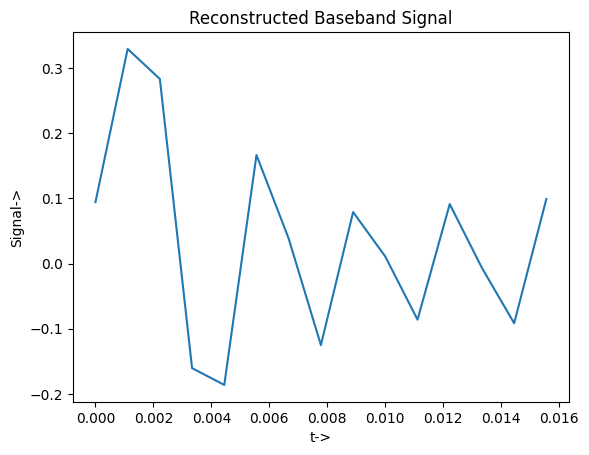

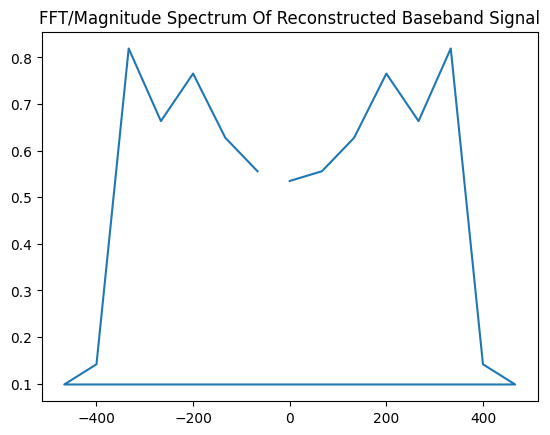

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy import signal
M=3 #minimum->M=2
f=100 #(Hz)
T=1/f #time period.
fs=M*f #(Hz)
Ts=1/fs
t=np.arange(0,5*T,0.1*T)
ts=np.arange(0,5*Ts,Ts/M)
x=np.cos(2*np.pi*f*t)
plt.plot(t,x)
plt.title("Baseband Signal")
plt.xlabel("t->")
plt.ylabel("Signal->")
plt.show()
xs=np.cos(2*np.pi*fs*ts)
plt.stem(ts*M,xs)
plt.title("Sampled Baseband Signal")
plt.xlabel("nTs->")
plt.ylabel("Signal->")
plt.show()
xfft=fft(x) #fft of baseband signal.
freqs = np.fft.fftfreq(len(xfft), d=0.1*T)
plt.plot(freqs,abs(xfft)) #plot of fft of baseband signal.
plt.title("FFT/Magnitude Spectrum Of Baseband Signal")
plt.show()
wp=(fs/2)/fs
ws=(fs-10)/fs
pass_band_att=3
stop_band_att=80
[N, Wn]=signal.buttord(wp,ws,pass_band_att,stop_band_att)
[b, a]=signal.butter(N,Wn,'low')
xr=signal.lfilter(b,a,xs)
plt.plot(ts,xr)
plt.title("Reconstructed Baseband Signal")
plt.xlabel("t->")
plt.ylabel("Signal->")
plt.show()
xrecfft=fft(xr)
freqs = np.fft.fftfreq(len(xrecfft), d=0.1*T)
plt.plot(freqs,abs(xrecfft))
plt.title("FFT/Magnitude Spectrum Of Reconstructed Baseband Signal")
plt.show()

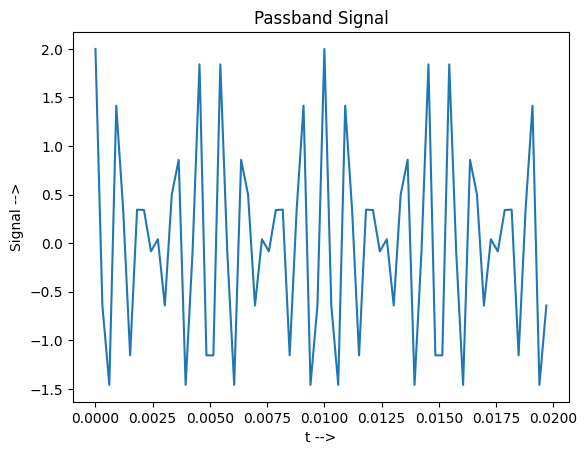

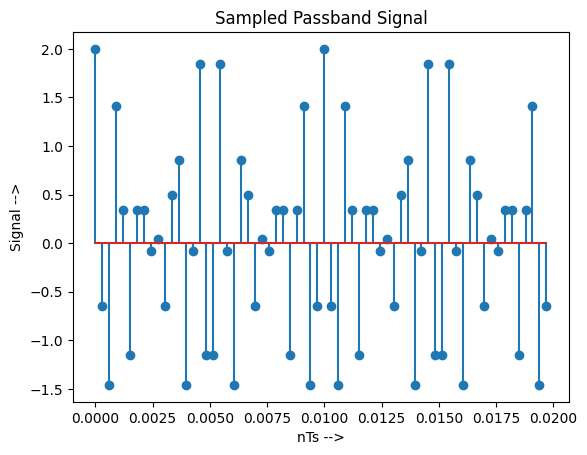

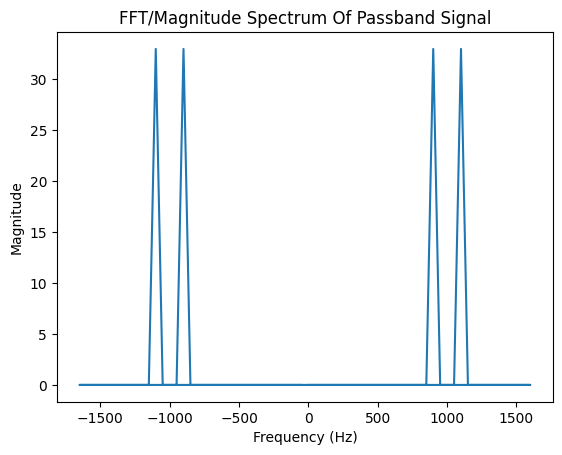

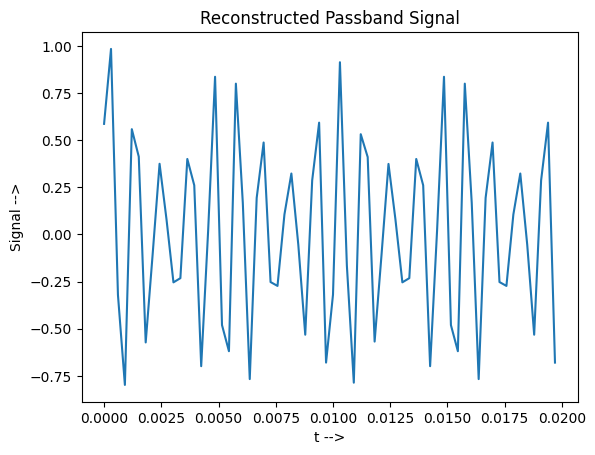

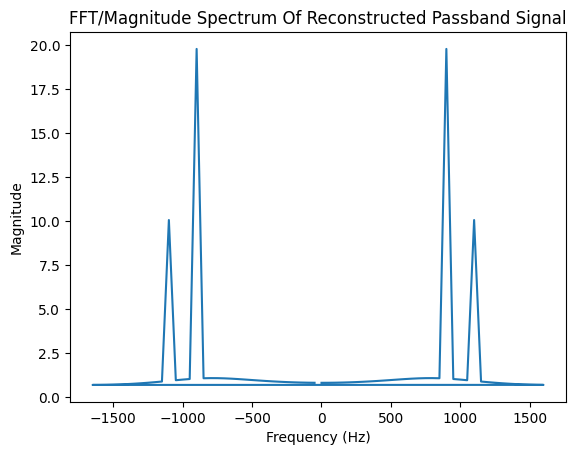

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal

M = 3            # Sampling factor
f_passband = 100  # Passband frequency (Hz)
A_passband = 1    # Amplitude of passband signal
f_carrier = 1000  # Carrier frequency (Hz)
A_carrier = 2     # Amplitude of carrier signal
# Sampling frequency
fs = M * (f_passband + f_carrier)
T = 1 / f_passband
Ts = 1 / fs
# Time vectors
t = np.arange(0, 2 * T, Ts)
ts = np.arange(0, 2 * T, Ts)
# Passband and carrier signals
x_passband = A_passband * np.cos(2 * np.pi * f_passband * t)
x_carrier = A_carrier * np.cos(2 * np.pi * f_carrier * t)
X = np.multiply(x_passband, x_carrier)
# Plot passband signal
plt.plot(t, X)
plt.title("Passband Signal")
plt.xlabel("t -->")
plt.ylabel("Signal -->")
plt.show()
# Sampled passband signal
Xs = np.multiply(x_passband, x_carrier)
# Plot sampled passband signal
plt.stem(ts, Xs)
plt.title("Sampled Passband Signal")
plt.xlabel("nTs -->")
plt.ylabel("Signal -->")
plt.show()
# FFT of passband signal
X_f = fft(X)
freqs = fftfreq(len(X_f), d=Ts)
# Shift frequency axis for passband signal FFT
# freqs_passband = np.fft.fftshift(freqs)
# X_f_shifted = np.fft.fftshift(X_f)
# Plot shifted frequency spectrum
plt.plot(freqs, abs(X_f))
plt.title("FFT/Magnitude Spectrum Of Passband Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
# Filter design
wp = (fs / 2) / fs
ws = (fs - 10) / fs
apb = 3
asb = 60
[N, Wn] = signal.buttord(wp, ws, apb, asb)
[b, a] = signal.butter(N, Wn, 'low')
# Reconstructed passband signal
Xr = signal.lfilter(b, a, Xs)
# Plot reconstructed passband signal
plt.plot(t, Xr)
plt.title("Reconstructed Passband Signal")
plt.xlabel("t -->")
plt.ylabel("Signal -->")
plt.show()
# FFT of reconstructed passband signal
Xr_f = fft(Xr)
# Shift frequency axis for reconstructed passband signal FFT
# Xr_f_shifted = np.fft.fftshift(Xr_f)
# Plot shifted frequency spectrum of reconstructed passband signal
plt.plot(freqs, abs(Xr_f))
plt.title("FFT/Magnitude Spectrum Of Reconstructed Passband Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()
